# 1. Load Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

# 2. Load Data & Pre-processing

In [2]:
df = pd.read_csv("Tick_DB.csv")
df = df.drop(["pid", "lat", "lat", "fid"], axis=1)
df.insert(0, "pid", 0)
for i in df.index:
    df.loc[i, 'pid'] = df.loc[i, 'sid'][:2]
avg = []
for t in df.date.sort_values().unique()[:-1]:
    temp = df[df.date == t].t_adult
    avg.append(temp.mean())

# 3. Visualization

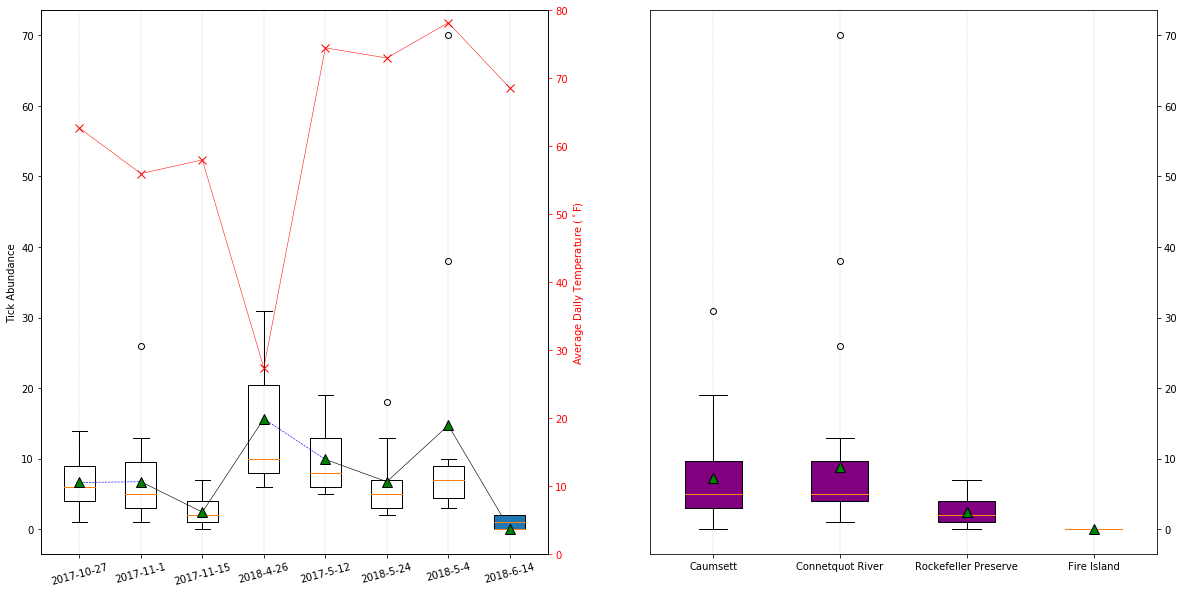

In [3]:
f = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((1, 2), (0, 0))
lt = []
time_stamp = []

for t in df.date.sort_values().unique()[:-1]:
    temp = np.array(df[df.date == t].t_adult)
    lt.append(temp)
    time_stamp.append(str(pd.DatetimeIndex([t]).year[0])+"-"+str(pd.DatetimeIndex([t]).month[0])+"-"+str(pd.DatetimeIndex([t]).day[0]))


meanpoints = dict(marker='^', markeredgecolor='black', markerfacecolor='green', markersize=10)
adult = ax1.boxplot(lt, positions=np.arange(len(lt))+1, showmeans=True, meanprops=meanpoints)
nymph = ax1.boxplot([np.array(df[df.date == df.date.sort_values().unique()[-2]].t_nymph)], positions=[8], widths=0.5, patch_artist=True)
ax1.set_xlim(0.5, 8.5)
ax1.set_xticks(np.arange(len(lt)) + 1)
ax1.set_xticklabels(time_stamp, rotation=15)
ax1.set_ylabel("Tick Abundance")

# Visualize mean values for each tick survey
ax1.plot([1, 2], [avg[0], avg[1]], '--b', linewidth=0.6, markersize=3)
ax1.plot([2, 3], [avg[1], avg[2]], '-k', linewidth=0.6, markersize=3)
ax1.plot([3, 4], [avg[2], avg[3]], '-k', linewidth=0.6, markersize=3)
ax1.plot([4, 5], [avg[3], avg[4]], '--b', linewidth=0.6, markersize=3)
ax1.plot([5, 6], [avg[4], avg[5]], '-k', linewidth=0.6, markersize=3)
ax1.plot([6, 7], [avg[5], avg[6]], '-k', linewidth=0.6, markersize=3)
ax1.plot([7, 8], [avg[6], avg[7]], '-k', linewidth=0.6, markersize=3)

ax1.grid(color='grey', linestyle='--', axis='x', linewidth=0.2)

# Plot temperature variations and corresponding twin axis
daily_avg_temp = np.array([62.7, 56.0, 58.0, 27.4, 74.5, 73.0, 78.2, 68.6])
temp_map = daily_avg_temp
ax2 = ax1.twinx()
ax2.plot(np.arange(len(lt)) + 1, temp_map, '-xr', linewidth=0.5, markersize=8)
ax2.set_ylim([0, 80])
ax2.set_ylabel(r'Average Daily Temperature ($^\circ$F)', color="red")
ax2.tick_params('y', colors="red")

ax3 = plt.subplot2grid((1, 2), (0, 1))
lst = []
p = []
m = []
for park in df.pid.unique():
    temp = df[df.pid == park]
    m.append(temp.t_adult.mean())
    lst.append(np.array(temp.t_adult))
    p.append(park)

meanpointprops = dict(marker='^', markeredgecolor='black', markerfacecolor='green', markersize=10)
boxplot = ax3.boxplot(lst, positions=np.arange(len(lst)), showmeans=True, meanprops=meanpointprops, patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor='purple')

ax3.set_xticks(np.arange(len(lst)))
ax3.set_xticklabels(['Caumsett', 'Connetquot River', 'Rockefeller Preserve', "Fire Island"])
ax3.grid(color='grey', linestyle='--', axis='x', linewidth=0.2)
ax3.yaxis.tick_right()
plt.show()

#f.savefig("Tick_Data_Stats.png", dpi=300)